# 环境准备

In [3]:
import numpy as np
from scipy.spatial import Delaunay
import networkx as nx
import matplotlib.pyplot as plt

# 数据准备

In [5]:
B_points = np.array(
    [[0,0],[80,0],[80,50],[0,50]],dtype="int"
)
A_points = np.array(
    [[20,15],[60,15],[60,35],[20,35]],dtype="int"
)
AllPoints = np.concatenate((A_points,B_points),axis = 0)

# 使用Delaunay三角剖分连接多边形顶点

In [7]:
tri = Delaunay(AllPoints)

In [9]:
myGraph = nx.Graph()
edges = set()
#根据三角剖分结果添加边
for simplex in tri.simplices:
    for i in range(3):
        edge = (simplex[i],simplex[(i+1)%3])
        edges.add(tuple(sorted(edge)))
#向图中添加边和权重
for edge in edges:
    u,v = edge
    weight = np.linalg.norm(AllPoints[u] - AllPoints[v])
    myGraph.add_edge(u,v,weight=weight)

#寻找最小生成树
mst = nx.minimum_spanning_tree(myGraph)

# 求奇数度顶点的最小成本完美匹配

匹配的边： {(3, 7), (0, 4), (2, 6), (1, 5)}


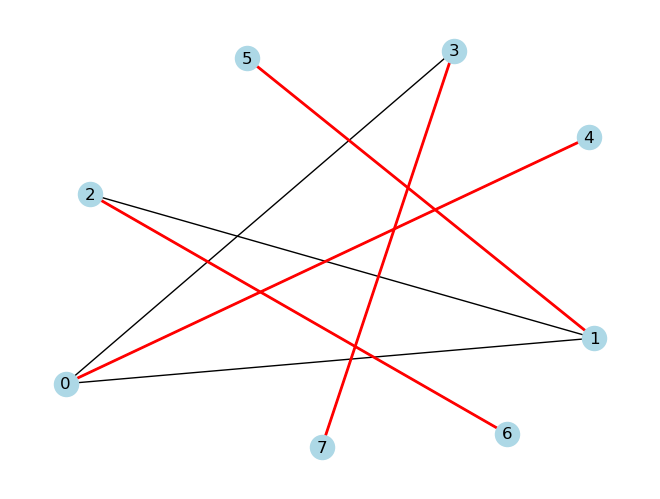

In [10]:
odd_degree_nodes = [node for node in mst.nodes() if mst.degree(node)]
odd_subgraph = mst.subgraph(odd_degree_nodes)

for u,v,data in odd_subgraph.edges(data=True):
    data['weight'] *= -1

min_cost_perfect_matching = nx.algorithms.matching.max_weight_matching(
    odd_subgraph,maxcardinality=True,weight='weight'
)

mst.add_edges_from(min_cost_perfect_matching)
myGraph.add_edges_from(min_cost_perfect_matching)

print("匹配的边：",min_cost_perfect_matching)

pos = nx.spring_layout(mst)
nx.draw(mst,pos,with_labels=True,node_color='lightblue')
nx.draw_networkx_edges(mst,pos,edgelist=min_cost_perfect_matching,edge_color='red',width=2)
plt.show()

In [42]:
#测试是否是欧拉图
all_even = all(deg % 2 == 0 for node, deg in myGraph.degree())
if all_even:
    eulerian_circuit = list(nx.eulerian_circuit(myGraph))
    pos = {i: p for i, p in enumerate(AllPoints)}
    nx.draw(myGraph, pos, with_labels=True, node_color='black')
    plt.show()
else:
    print("当前图不是欧拉图，无法生成欧拉回路。")

当前图不是欧拉图，无法生成欧拉回路。


In [40]:
eulerian_circuit = list(nx.eulerian_circuit(myGraph))
pos = {i:p for i,p in enumerate(AllPoints)}
nx.draw(myGraph,pos,with_labels=True,node_color='black')
plt.show()

NetworkXError: G is not Eulerian.